# Example 2

source : https://youtu.be/s2K1JfNR7Sc?si=mGf0PhD6zwwOTU_8

In [1]:
import numpy as np
from matplotlib import pyplot as plt

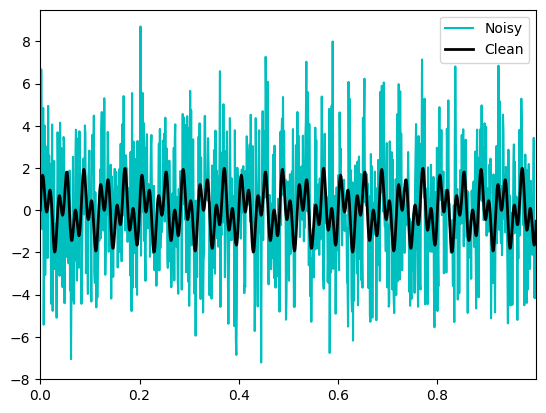

In [2]:
# Create a simple signal with two frequencies
dt = 0.001 # sample per second
t = np.arange(0,1, dt)

# sin waves of 50Hz and 120Hz, with +/- 2 sinwaves
f = np.sin(1*np.pi*50*t) + np.sin(1*np.pi*120*t) # sum of two frequencies
f_clean = f
# Add of a lot of noise with +/- 2.5 sin waves
f = f + 2.5 * np.random.randn(len(t)) # Add some noise

plt.plot(t,f, color='c', linewidth=1.5,label='Noisy')
plt.plot(t,f_clean, color='k', linewidth=2,label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

/home/cedric/Documents/FastFourierTransform/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/cedric/Documents/FastFourierTransform/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


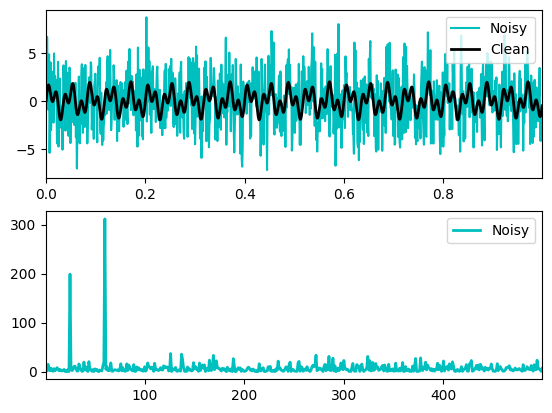

In [3]:
# Compute of the FFT

n = len(t)
fhat = np.fft.fft(f,n)                       # Compute the FFT
PSD = fhat * np.conj(fhat) / n               # Power Spectrum Density(power per )
freq = (1/(dt*n) * np.arange(n))             # Create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int') # nly plot the first

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f, color='c', linewidth=1.5,label='Noisy')
plt.plot(t,f_clean, color='k', linewidth=2,label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
plt.xlim(freq[L][0], freq[L][-1])
plt.legend()

plt.show()

In [4]:
# Use the PSD to filter out noise

indices = PSD > 100         # Find all freqs with power larger than 100
PSDclean = PSD * indices    # Zero out all others
fhat = indices * fhat       # Zero out small fourier coeffs in Y
ffilt = np.fft.ifft(fhat)   # Inverse FFT for filttered time signal

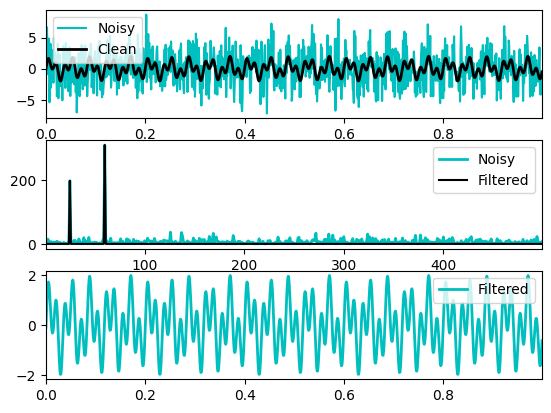

In [5]:
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f, color='c', linewidth=1.5,label='Noisy')
plt.plot(t,f_clean, color='k', linewidth=2,label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', linewidth=1.5, label='Filtered')
plt.xlim(freq[L][0], freq[L][-1])
plt.legend()

plt.sca(axs[2])
plt.plot(t, ffilt, color='c', linewidth=2, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.show()